# Check the effect of the bugs in the code

Load the libraries

In [61]:
import numpy as np
from astropy.table import Table, join
import matplotlib.pyplot as plt

In [62]:
%matplotlib inline

## Load the data

In [2]:
idp = "idata/main_pdf_v0.8-b"

In [18]:
idp_old = "idata/main_pdf_v0.8"

In [6]:
lnew = Table.read(idp+"/lofar_m5.fits")

In [19]:
lold = Table.read(idp_old+"/lofar_m5.fits")

In [20]:
merged = join(lnew, lold, keys=["Source_Name"], table_names=["new", "old"])

### Check the shape of the data

In [21]:
len(lnew)

91332

In [22]:
len(lold)

91332

Compute the difference between the LR

In [65]:
diff_lr = merged['lr_5_old']-merged['lr_5_new']

In [66]:
len(diff_lr)

91332

## Explore the differences

Plot of the difference in LR with respect to the new LR

Text(0,0.5,'LR diff')

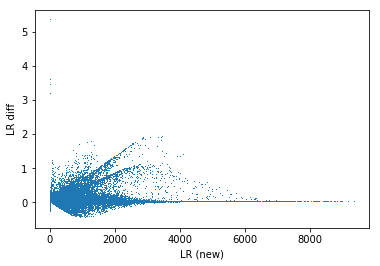

In [67]:
plt.plot(merged['lr_5_new'], diff_lr, marker=",", ls="")
plt.xlabel("LR (new)")
plt.ylabel("LR diff")

Plot of the absolute difference in LR with respect to the new LR in log space.

Text(0,0.5,'log abs. LR diff')

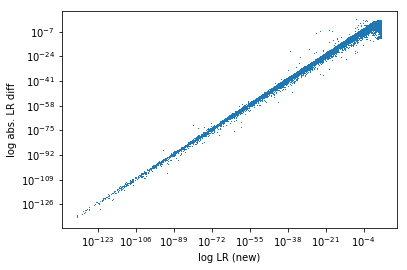

In [68]:
plt.loglog(merged['lr_5_new'], np.abs(diff_lr), marker=",", ls="")
plt.xlabel("log LR (new)")
plt.ylabel("log abs. LR diff")

Thresholds

In [38]:
told = 0.69787
tnew = 0.71684

Plot of the percentage of absolute difference in LR with respect to the new LR with the y axis in log space. Sources always below the threshold are plotted in orange.

Text(0,0.5,'log percent abs. LR diff')

/disk2/jsm/prog/anaconda3/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


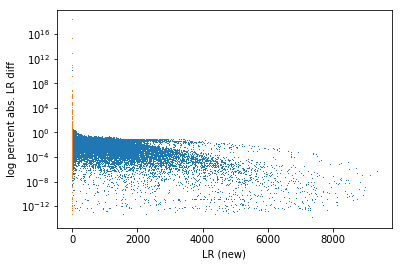

In [77]:
cond_sel = ((merged['lr_5_old'] >= told) | (merged['lr_5_new'] >= tnew))
cond_nosel = ((merged['lr_5_old'] < told) & (merged['lr_5_new'] < tnew))
plt.semilogy(merged['lr_5_new'][cond_sel], (np.abs(diff_lr)/merged['lr_5_new']*100)[cond_sel], marker=",", ls="")
plt.semilogy(merged['lr_5_new'][cond_nosel], (np.abs(diff_lr)/merged['lr_5_new']*100)[cond_nosel], marker=",", ls="")
plt.xlabel("LR (new)")
plt.ylabel("log percent abs. LR diff")

Plot of the percentage of absolute difference in LR with respect to the new LR in log space. Sources always below the threshold are plotted in orange and the galaxies that are not matched now are plotted as green crosses.

/disk2/jsm/prog/anaconda3/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


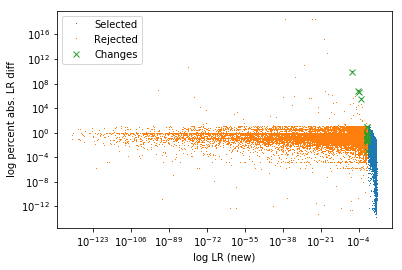

In [83]:
cond_sel = ((merged['lr_5_old'] >= told) | (merged['lr_5_new'] >= tnew))
cond_nosel = ((merged['lr_5_old'] < told) & (merged['lr_5_new'] < tnew))
cond_change = ((merged['lr_5_old'] >= told) & (merged['lr_5_new'] < tnew))
plt.loglog(merged['lr_5_new'][cond_sel], (np.abs(diff_lr)/merged['lr_5_new']*100)[cond_sel], marker=",", ls="", label="Selected")
plt.loglog(merged['lr_5_new'][cond_nosel], (np.abs(diff_lr)/merged['lr_5_new']*100)[cond_nosel], marker=",", ls="", label="Rejected")
plt.loglog(merged['lr_5_new'][cond_change], (np.abs(diff_lr)/merged['lr_5_new']*100)[cond_change], marker="x", ls="", label="Changes")
plt.xlabel("log LR (new)")
plt.ylabel("log percent abs. LR diff")
plt.legend()

The same plot than before but using the new threshold for the old LR.

/disk2/jsm/prog/anaconda3/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


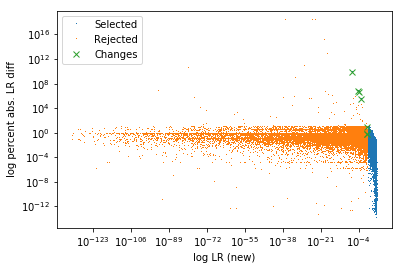

In [100]:
# Use new threshold for old data as well
cond_sel = ((merged['lr_5_old'] >= tnew) | (merged['lr_5_new'] >= tnew))
cond_nosel = ((merged['lr_5_old'] < tnew) & (merged['lr_5_new'] < tnew))
cond_change = ((merged['lr_5_old'] >= tnew) & (merged['lr_5_new'] < tnew))
plt.loglog(merged['lr_5_new'][cond_sel], (np.abs(diff_lr)/merged['lr_5_new']*100)[cond_sel], marker=",", ls="", label="Selected")
plt.loglog(merged['lr_5_new'][cond_nosel], (np.abs(diff_lr)/merged['lr_5_new']*100)[cond_nosel], marker=",", ls="", label="Rejected")
plt.loglog(merged['lr_5_new'][cond_change], (np.abs(diff_lr)/merged['lr_5_new']*100)[cond_change], marker="x", ls="", label="Changes")
plt.xlabel("log LR (new)")
plt.ylabel("log percent abs. LR diff")
plt.legend()

Direct comparison of the LR of the sources that changed. Most of them are close to the threshold change but in 4 cases there are big differences.

Text(0,0.5,'LR (old)')

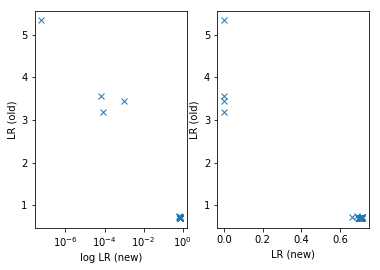

In [99]:
cond_change = ((merged['lr_5_old'] >= told) & (merged['lr_5_new'] < tnew))
plt.subplot(1,2,1)
plt.semilogx(merged['lr_5_new'][cond_change], merged['lr_5_old'][cond_change], marker="x", ls="")
plt.xlabel("log LR (new)")
plt.ylabel("LR (old)")
plt.subplot(1,2,2)
plt.plot(merged['lr_5_new'][cond_change], merged['lr_5_old'][cond_change], marker="x", ls="")
plt.xlabel("LR (new)")
plt.ylabel("LR (old)")

### Number of sources with respect to the thresholds

In [50]:
np.sum((merged['lr_5_old'] >= told) & (merged['lr_5_new'] >= tnew))

67188

In [87]:
np.sum((merged['lr_5_old'] >= told) & (merged['lr_5_new'] < tnew))

29

In [52]:
np.sum((merged['lr_5_old'] < told) & (merged['lr_5_new'] >= tnew))

0

In [53]:
np.sum((merged['lr_5_old'] < told) & (merged['lr_5_new'] < tnew))

24115

The percentage of changes due to the bug

In [102]:
4/91332*100

0.004379625979941313